# **US Weather Data Analysis**

## Importing the necessary libraries

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

## Reading the data

We'll start by looking at a single city first, in this case, Charlotte.

In [15]:
clt_weather_df = pd.read_csv('KCLT.csv')

In [16]:
clt_weather_df.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65


## Exploratory Data Analysis

In [20]:
clt_weather_df.info()    # to check whether there are any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   365 non-null    object 
 1   actual_mean_temp       365 non-null    int64  
 2   actual_min_temp        365 non-null    int64  
 3   actual_max_temp        365 non-null    int64  
 4   average_min_temp       365 non-null    int64  
 5   average_max_temp       365 non-null    int64  
 6   record_min_temp        365 non-null    int64  
 7   record_max_temp        365 non-null    int64  
 8   record_min_temp_year   365 non-null    int64  
 9   record_max_temp_year   365 non-null    int64  
 10  actual_precipitation   365 non-null    float64
 11  average_precipitation  365 non-null    float64
 12  record_precipitation   365 non-null    float64
dtypes: float64(3), int64(9), object(1)
memory usage: 37.2+ KB


On first glance, it does not look like there are any missing values in the dataset.

We can see that the date column is object datatype. Let's convert it to datetime format.

In [38]:
clt_weather_df['date'] = pd.to_datetime(clt_weather_df['date'])


# Let's check!
print(clt_weather_df.dtypes)

date                     datetime64[ns]
actual_mean_temp                  int64
actual_min_temp                   int64
actual_max_temp                   int64
average_min_temp                  int64
average_max_temp                  int64
record_min_temp                   int64
record_max_temp                   int64
record_min_temp_year              int64
record_max_temp_year              int64
actual_precipitation            float64
average_precipitation           float64
record_precipitation            float64
dtype: object


### Summary Stats

In [19]:
clt_weather_df.describe()      #to get the summary of statistics

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,61.049315,49.958904,71.630137,48.819178,70.983562,31.465753,88.728767,1953.279452,1953.989041,0.102411,0.114082,2.208904
std,16.061789,16.575533,16.450481,13.832203,13.495207,18.430656,9.961209,39.170924,33.890497,0.301195,0.013650,0.879378
min,18.000000,7.000000,26.000000,29.000000,50.000000,-5.000000,69.000000,1879.000000,1879.000000,0.000000,0.090000,0.850000
25%,47.000000,37.000000,58.000000,36.000000,58.000000,15.000000,79.000000,1918.000000,1931.000000,0.000000,0.100000,1.650000
50%,63.000000,52.000000,73.000000,48.000000,72.000000,30.000000,90.000000,1963.000000,1953.000000,0.000000,0.110000,1.980000
75%,75.000000,65.000000,86.000000,63.000000,84.000000,49.000000,98.000000,1983.000000,1984.000000,0.030000,0.120000,2.540000
max,88.000000,75.000000,100.000000,68.000000,89.000000,62.000000,104.000000,2015.000000,2015.000000,2.650000,0.150000,6.880000


In [30]:
clt_weather_df.isnull().sum() # Checking the values

date                     0
actual_mean_temp         0
actual_min_temp          0
actual_max_temp          0
average_min_temp         0
average_max_temp         0
record_min_temp          0
record_max_temp          0
record_min_temp_year     0
record_max_temp_year     0
actual_precipitation     0
average_precipitation    0
record_precipitation     0
dtype: int64

In [ ]:
# verifying the start and end date
clt_weather_df.sort_values(by='date')

In [54]:
# Checking for outliers
print(clt_weather_df['record_min_temp_year'].min())
print(clt_weather_df['record_min_temp_year'].max())

1879
2015


Since the data started from 1880, we found there are three instances of 1879, but choosing to keep them

In [55]:
clt_weather_df['record_min_temp_year'].value_counts()[1879]

3

Visualizing the trend between actual mininum, average minimum, and record minimum temperature

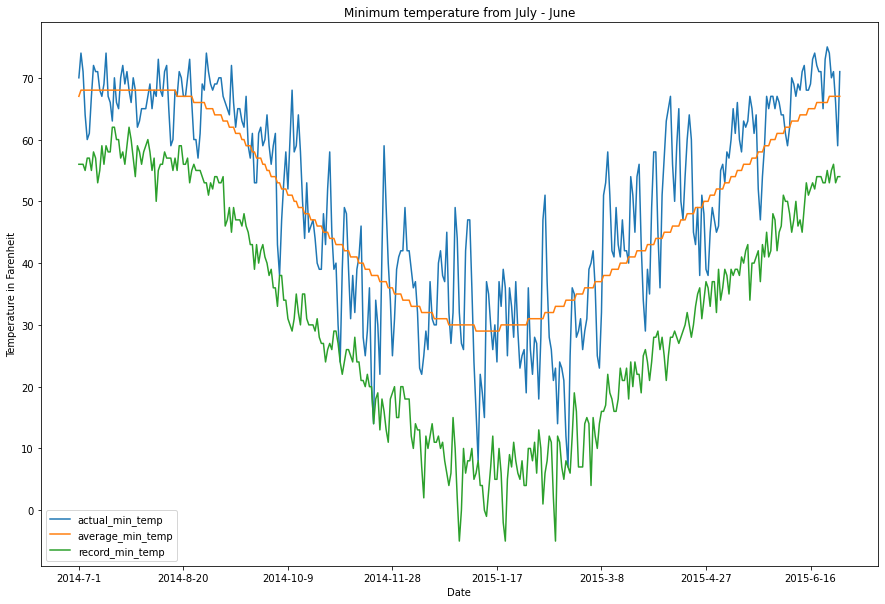

In [140]:
clt_weather_data.plot(x = 'date',y = ['actual_min_temp', 'average_min_temp', 'record_min_temp'], figsize=(15,10))
plt.xlabel("Date")
plt.ylabel("Temperature in Farenheit")
plt.title("Minimum temperature from July - June")
plt.show()

Visualizing the trend between actual maximum, average maximum, and record maximum temperature

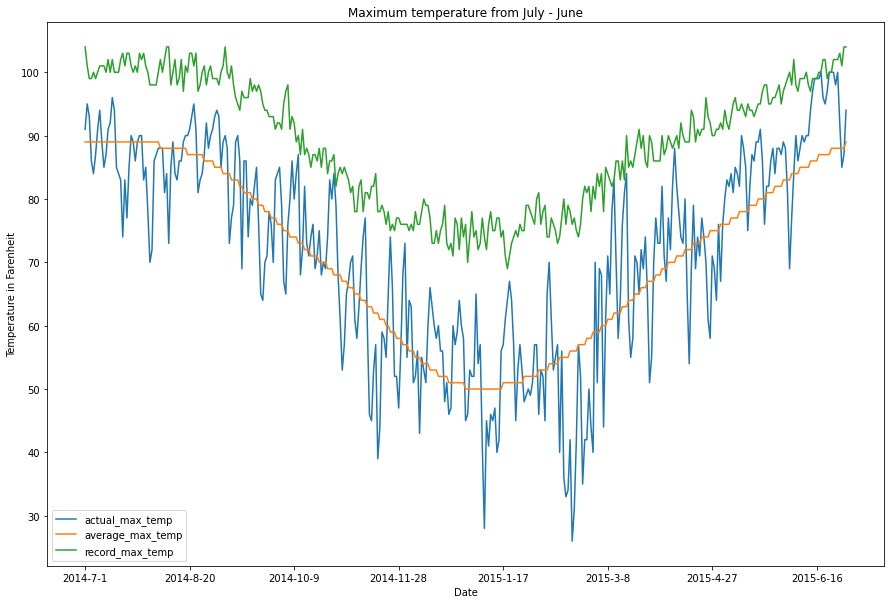

In [141]:
clt_weather_data.plot(x = 'date', y = ['actual_max_temp', 'average_max_temp', 'record_max_temp'], figsize=(15,10))
plt.xlabel("Date")
plt.ylabel("Temperature in Farenheit")
plt.title("Maximum temperature from July - June")
plt.show()

Let's create a `month` column in order to look at aggregate statistics

In [60]:
clt_weather_df['month'] = clt_weather_df['date'].dt.month
clt_weather_df.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation,month
0,2014-07-01,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91,7
1,2014-07-02,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53,7
2,2014-07-03,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50,7
3,2014-07-04,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63,7
4,2014-07-05,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65,7


Now that we've looked at data from Charlotte, lets merge all of the files to compare data from different cities

## Merging CSV files

In [104]:
# Script to read and merge csv files into single dataframe

files = ['KCLT.csv','KCQT.csv','KHOU.csv','KIND.csv','KJAX.csv','KMDW.csv','KNYC.csv','KPHL.csv','KPHX.csv','KSEA.csv']
cities = ['Charlotte','Los Angeles','Houston','Indianapolis','Jacksonville','Chicago','New York','Philadelphia','Phoenix','Seattle']



merged_df = pd.DataFrame()

for idx, file in enumerate(files):
    current_data = pd.read_csv("./"+file)
    current_data["city"] =cities[idx]
    merged_df = pd.concat([merged_df, current_data])

merged_df['date'] = pd.to_datetime(merged_df['date'])  

merged_df['month'] = merged_df['date'].dt.month

In [105]:
merged_df.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation,city,month
0,2014-07-01,81,70,91,67,89,56,104,1919.0,2012.0,0.00,0.10,5.91,Charlotte,7
1,2014-07-02,85,74,95,68,89,56,101,2008.0,1931.0,0.00,0.10,1.53,Charlotte,7
2,2014-07-03,82,71,93,68,89,56,99,2010.0,1931.0,0.14,0.11,2.50,Charlotte,7
3,2014-07-04,75,64,86,68,89,55,99,1933.0,1955.0,0.00,0.10,2.63,Charlotte,7
4,2014-07-05,72,60,84,68,89,57,100,1967.0,1954.0,0.00,0.10,1.65,Charlotte,7


In [106]:
merged_df['city'].unique() # Checking for unique cities

array(['Charlotte', 'Los Angeles', 'Houston', 'Indianapolis',
       'Jacksonville', 'Chicago', 'New York', 'Philadelphia', 'Phoenix',
       'Seattle'], dtype=object)

Let's see how much the data from 2014-2015 varies from the mean historic data from 1880 onwards

In [107]:
merged_df['min_diff'] = merged_df['actual_min_temp'] - merged_df['average_min_temp']
merged_df['max_diff'] = merged_df['actual_max_temp'] - merged_df['average_max_temp']

Now, let's figure out the average of the minimum and maximum differences in the cities, so that we can see what cities showed a major change in temperature

In [108]:
# plt.figure(figsize=(19,10))
average_diff_min_temp_city = []
average_diff_max_temp_city = []
for city in cities:
  average_diff_min_temp_city.append(np.mean(merged_df[merged_df['city'] == city]['min_diff']))
  average_diff_max_temp_city.append(np.mean(merged_df[merged_df['city'] == city]['max_diff']))

In [109]:
print(average_diff_min_temp_city)
print(average_diff_max_temp_city)

[1.1397260273972603, 3.0246575342465754, 0.030136986301369864, -1.6876712328767123, 0.31232876712328766, -0.6575342465753424, -0.7698630136986301, 0.043835616438356165, 2.26027397260274, 3.3232876712328765]
[0.6465753424657534, 2.589041095890411, -0.9835616438356164, -2.5095890410958903, -0.13150684931506848, -0.7589041095890411, -0.3452054794520548, -0.7397260273972602, 1.6712328767123288, 3.871232876712329]


<BarContainer object of 10 artists>

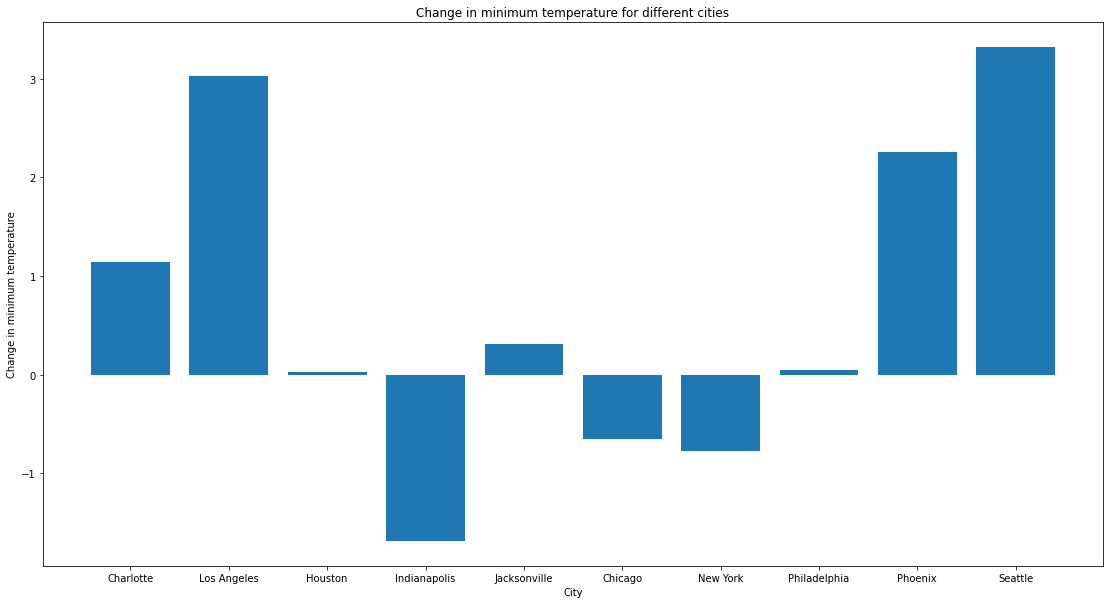

In [142]:
plt.figure(figsize=(19,10))
plt.xlabel("City")
plt.ylabel("Change in minimum temperature")
plt.title("Change in minimum temperature for different cities")
plt.bar(cities, average_diff_min_temp_city)

<BarContainer object of 10 artists>

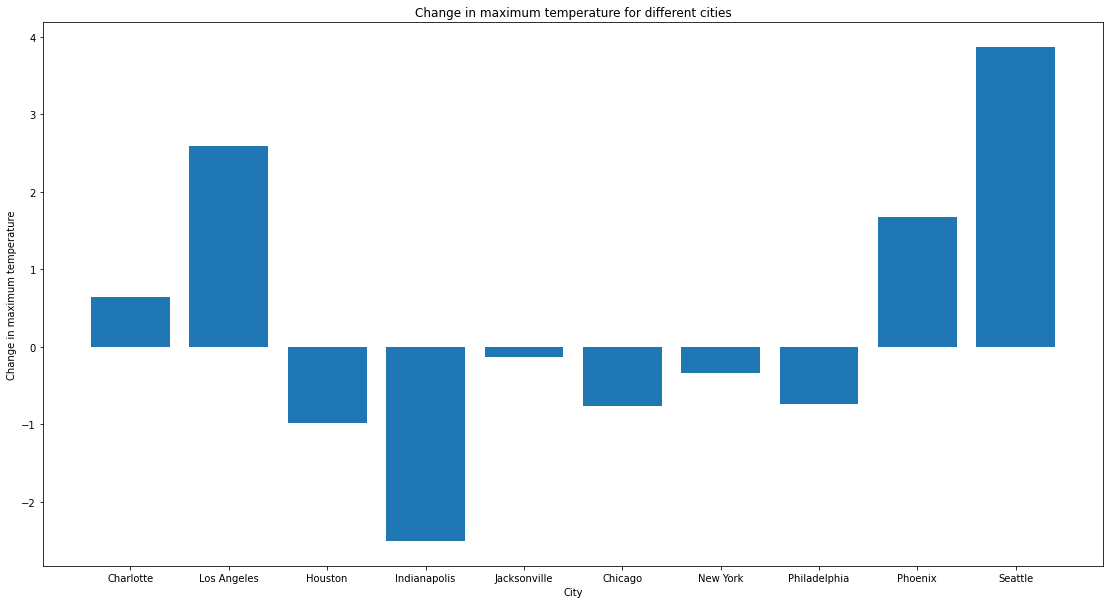

In [143]:
plt.figure(figsize=(19,10))
plt.xlabel("City")
plt.ylabel("Change in maximum temperature")
plt.title("Change in maximum temperature for different cities")
plt.bar(cities, average_diff_max_temp_city)

## Data Preparation for Tableau Dashboard

Let's create some more visualizations using Tableau. For this we'll group our data by month and city, to see how temperature and precipitation changes over the year for different cities across the US

In [138]:
group_by_city_month_df = merged_df.groupby(['city','month'] ,as_index=False).mean()
group_by_city_month_df.reset_index()

group_by_city_month_df['month'] = group_by_city_month_df['month'].apply(lambda x: calendar.month_abbr[x])

print(group_by_city_month_df.head())
print(group_by_city_month_df.dtypes)

# group_by_cty_df.shape

        city month  actual_mean_temp  ...  record_precipitation  min_diff  max_diff
0  Charlotte   Jan         40.516129  ...              1.820645 -0.258065  0.612903
1  Charlotte   Feb         37.714286  ...              1.799643 -5.750000 -7.392857
2  Charlotte   Mar         54.387097  ...              1.989355  2.838710  2.870968
3  Charlotte   Apr         62.466667  ...              1.989000  5.066667  0.500000
4  Charlotte   May         71.935484  ...              2.182903  3.548387  4.935484

[5 rows x 16 columns]
city                      object
month                     object
actual_mean_temp         float64
actual_min_temp          float64
actual_max_temp          float64
average_min_temp         float64
average_max_temp         float64
record_min_temp          float64
record_max_temp          float64
record_min_temp_year     float64
record_max_temp_year     float64
actual_precipitation     float64
average_precipitation    float64
record_precipitation     float64
min_diff   

In [139]:
group_by_city_month_df.to_csv('City_month.csv')

In [114]:
merged_df.to_csv('merge_excel.csv')